# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://deep-learning-su.github.io/assignment-requirements/) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from deep_learning_su.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [10]:
from deep_learning_su.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'deep_learning_su/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [11]:
from deep_learning_su.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [13]:
# Preprocessing: reshape the image data into rows
X_train_feats = np.reshape(X_train_feats, (X_train_feats.shape[0], -1))
X_val_feats = np.reshape(X_val_feats, (X_val_feats.shape[0], -1))
X_test_feats = np.reshape(X_test_feats, (X_test_feats.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train_feats.shape)
print('Validation data shape: ', X_train_feats.shape)
print('Test data shape: ', X_train_feats.shape)

Training data shape:  (49000, 155)
Validation data shape:  (49000, 155)
Test data shape:  (49000, 155)


## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

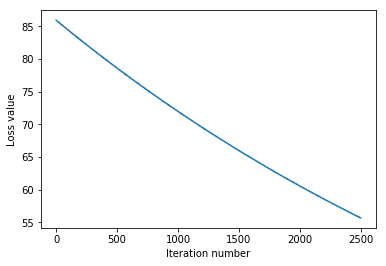

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+04
training accuracy: 0.122184
validation accuracy: 0.120000


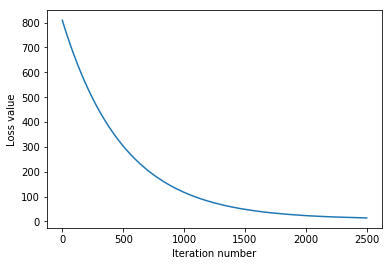

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+05
training accuracy: 0.112857
validation accuracy: 0.107000


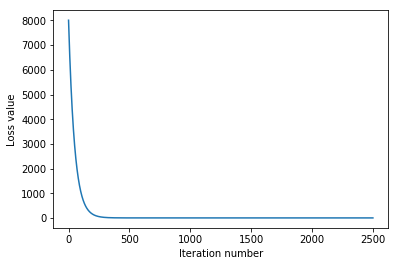

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+06
training accuracy: 0.414551
validation accuracy: 0.409000


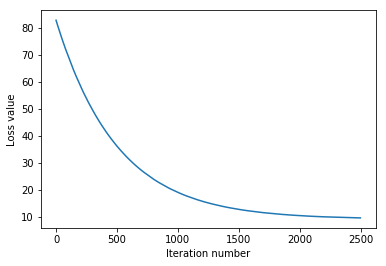

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+04
training accuracy: 0.107755
validation accuracy: 0.115000


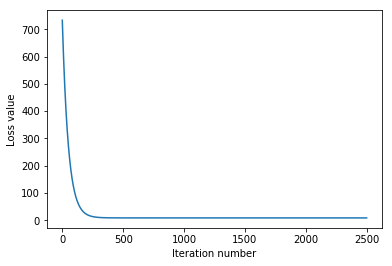

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+05
training accuracy: 0.413490
validation accuracy: 0.426000


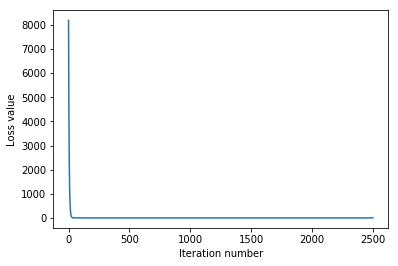

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+06
training accuracy: 0.405837
validation accuracy: 0.425000


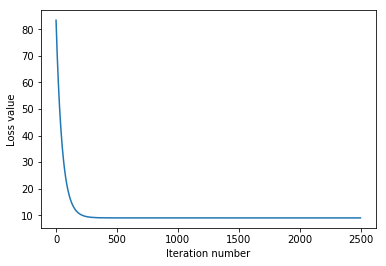

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+04
training accuracy: 0.413347
validation accuracy: 0.422000


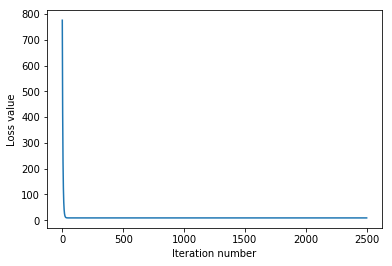

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+05
training accuracy: 0.402510
validation accuracy: 0.413000


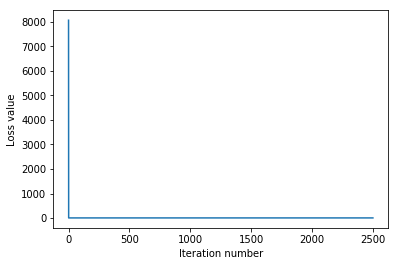

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+06
training accuracy: 0.336122
validation accuracy: 0.345000
lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.122184 val accuracy: 0.120000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.112857 val accuracy: 0.107000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.414551 val accuracy: 0.409000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.107755 val accuracy: 0.115000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.413490 val accuracy: 0.426000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.405837 val accuracy: 0.425000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.413347 val accuracy: 0.422000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.402510 val accuracy: 0.413000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.336122 val accuracy: 0.345000
best validation accuracy achieved during cross-validation: 0.426000


In [27]:
# Use the validation set to tune the learning rate and regularization strength

from itertools import product
from deep_learning_su.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

for lr, reg in product(learning_rates, regularization_strengths):
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=2500, verbose=False)
    
    plt.plot(loss_hist)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    print("Learning Rate: %e\nRegularization Strength: %e" % (lr, reg))

    y_train_pred = svm.predict(X_train_feats)
    training_accuracy = np.mean(y_train == y_train_pred)
    print('training accuracy: %f' % training_accuracy)
    y_val_pred = svm.predict(X_val_feats)
    val_accuracy = np.mean(y_val == y_val_pred)
    print('validation accuracy: %f' % val_accuracy)
    results[(lr, reg)] = (training_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_svm = svm

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

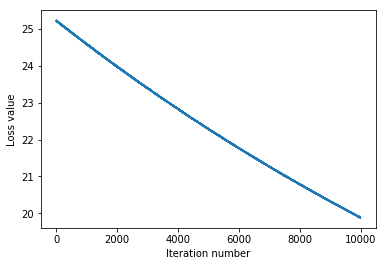

Learning Rate: 1.000000e-09
Regularization Strength: 1.000000e+04
training accuracy: 0.112653
validation accuracy: 0.106000


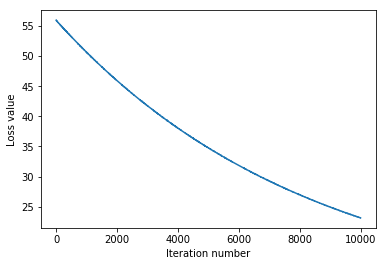

Learning Rate: 1.000000e-09
Regularization Strength: 3.000000e+04
training accuracy: 0.108449
validation accuracy: 0.117000


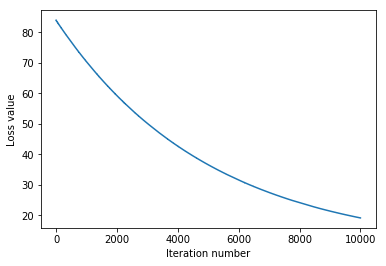

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+04
training accuracy: 0.087755
validation accuracy: 0.076000


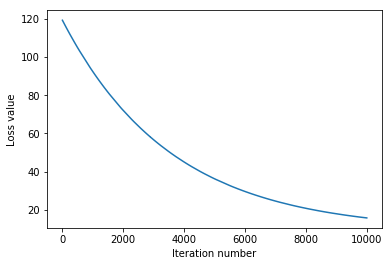

Learning Rate: 1.000000e-09
Regularization Strength: 7.000000e+04
training accuracy: 0.086367
validation accuracy: 0.085000


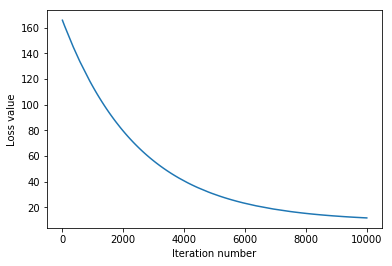

Learning Rate: 1.000000e-09
Regularization Strength: 1.000000e+05
training accuracy: 0.090918
validation accuracy: 0.095000


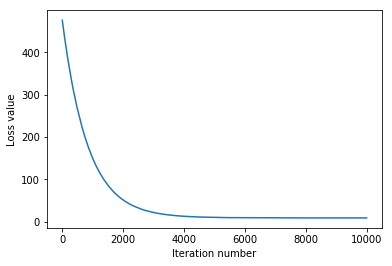

Learning Rate: 1.000000e-09
Regularization Strength: 3.000000e+05
training accuracy: 0.175551
validation accuracy: 0.162000


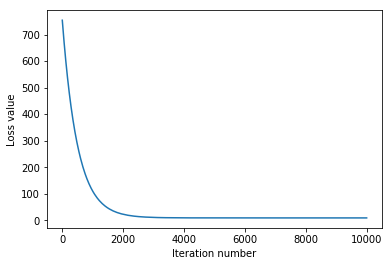

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+05
training accuracy: 0.409143
validation accuracy: 0.408000


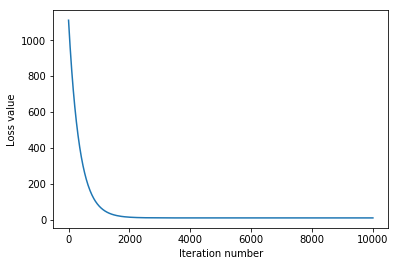

Learning Rate: 1.000000e-09
Regularization Strength: 7.000000e+05
training accuracy: 0.416388
validation accuracy: 0.420000


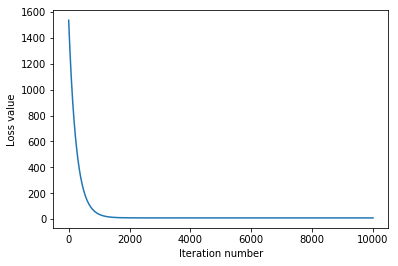

Learning Rate: 1.000000e-09
Regularization Strength: 1.000000e+06
training accuracy: 0.414000
validation accuracy: 0.423000


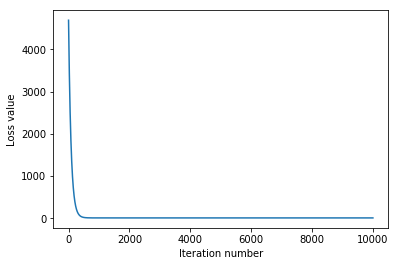

Learning Rate: 1.000000e-09
Regularization Strength: 3.000000e+06
training accuracy: 0.417041
validation accuracy: 0.423000


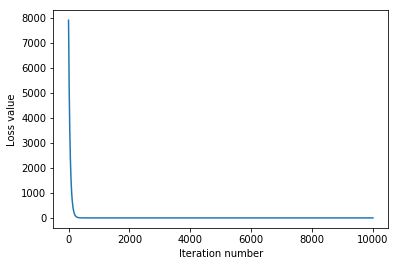

Learning Rate: 1.000000e-09
Regularization Strength: 5.000000e+06
training accuracy: 0.414714
validation accuracy: 0.420000


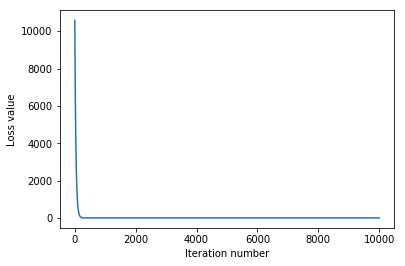

Learning Rate: 1.000000e-09
Regularization Strength: 7.000000e+06
training accuracy: 0.414694
validation accuracy: 0.420000


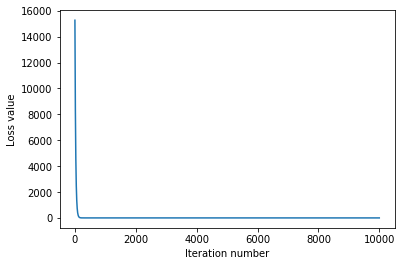

Learning Rate: 1.000000e-09
Regularization Strength: 1.000000e+07
training accuracy: 0.412490
validation accuracy: 0.401000


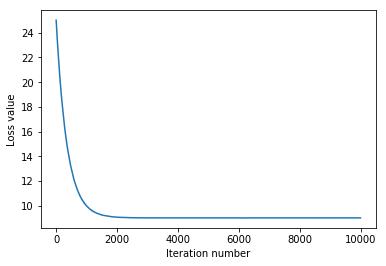

Learning Rate: 7.000000e-08
Regularization Strength: 1.000000e+04
training accuracy: 0.413878
validation accuracy: 0.414000


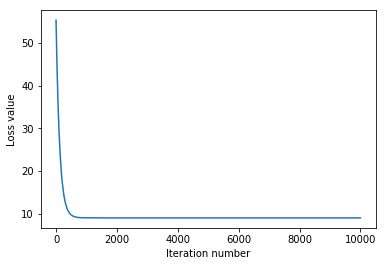

Learning Rate: 7.000000e-08
Regularization Strength: 3.000000e+04
training accuracy: 0.413408
validation accuracy: 0.420000


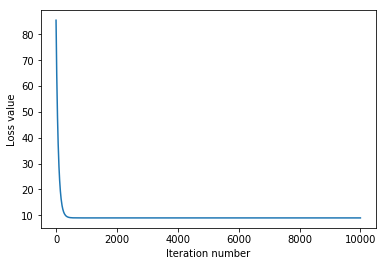

Learning Rate: 7.000000e-08
Regularization Strength: 5.000000e+04
training accuracy: 0.415102
validation accuracy: 0.418000


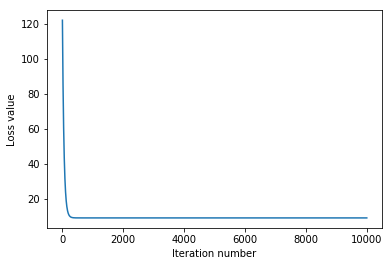

Learning Rate: 7.000000e-08
Regularization Strength: 7.000000e+04
training accuracy: 0.415163
validation accuracy: 0.415000


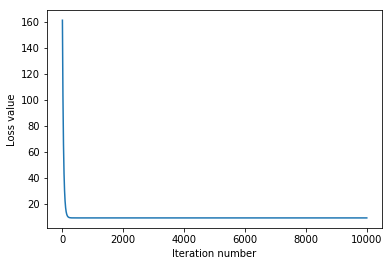

Learning Rate: 7.000000e-08
Regularization Strength: 1.000000e+05
training accuracy: 0.412224
validation accuracy: 0.423000


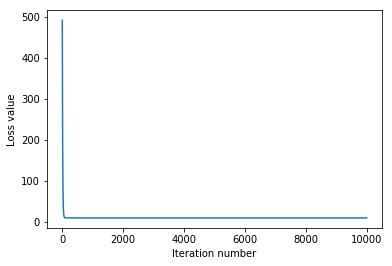

Learning Rate: 7.000000e-08
Regularization Strength: 3.000000e+05
training accuracy: 0.407102
validation accuracy: 0.419000


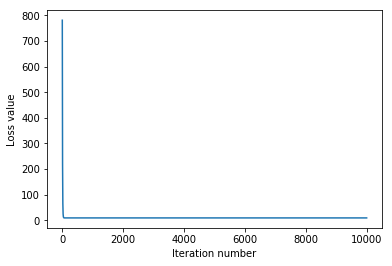

Learning Rate: 7.000000e-08
Regularization Strength: 5.000000e+05
training accuracy: 0.406265
validation accuracy: 0.415000


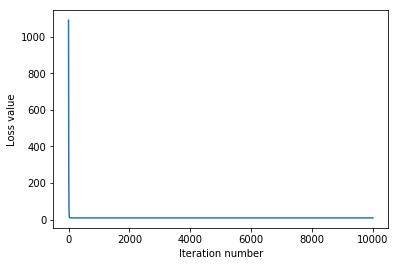

Learning Rate: 7.000000e-08
Regularization Strength: 7.000000e+05
training accuracy: 0.400469
validation accuracy: 0.396000


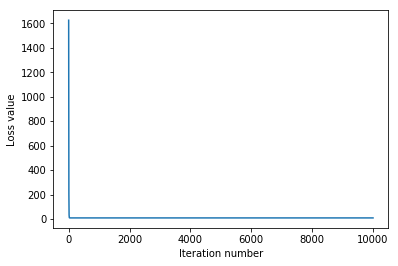

Learning Rate: 7.000000e-08
Regularization Strength: 1.000000e+06
training accuracy: 0.397327
validation accuracy: 0.408000


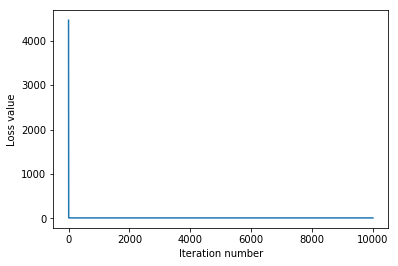

Learning Rate: 7.000000e-08
Regularization Strength: 3.000000e+06
training accuracy: 0.392878
validation accuracy: 0.401000


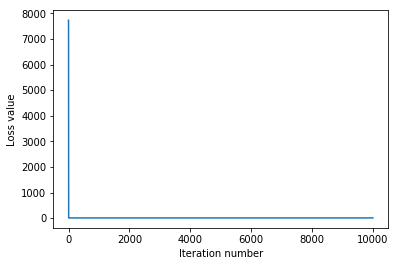

Learning Rate: 7.000000e-08
Regularization Strength: 5.000000e+06
training accuracy: 0.353510
validation accuracy: 0.342000


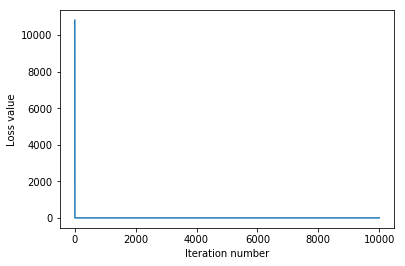

Learning Rate: 7.000000e-08
Regularization Strength: 7.000000e+06
training accuracy: 0.314429
validation accuracy: 0.305000


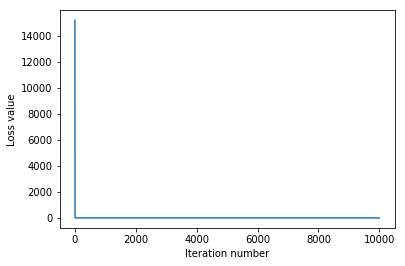

Learning Rate: 7.000000e-08
Regularization Strength: 1.000000e+07
training accuracy: 0.280286
validation accuracy: 0.262000


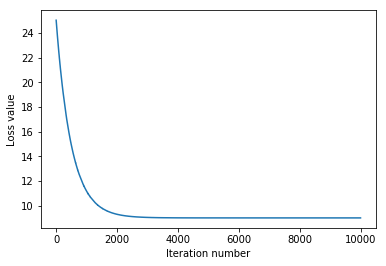

Learning Rate: 5.000000e-08
Regularization Strength: 1.000000e+04
training accuracy: 0.414388
validation accuracy: 0.417000


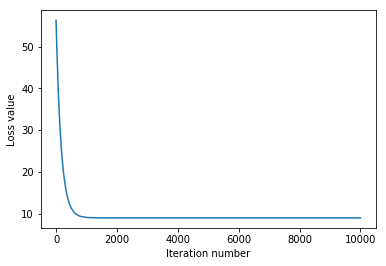

Learning Rate: 5.000000e-08
Regularization Strength: 3.000000e+04
training accuracy: 0.417429
validation accuracy: 0.420000


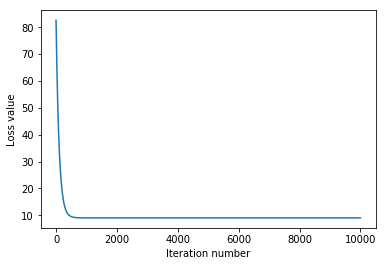

Learning Rate: 5.000000e-08
Regularization Strength: 5.000000e+04
training accuracy: 0.415306
validation accuracy: 0.421000


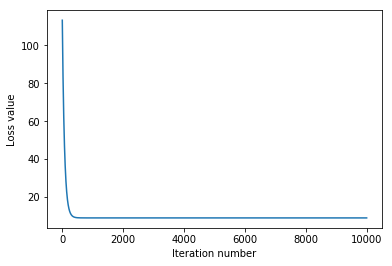

Learning Rate: 5.000000e-08
Regularization Strength: 7.000000e+04
training accuracy: 0.414347
validation accuracy: 0.413000


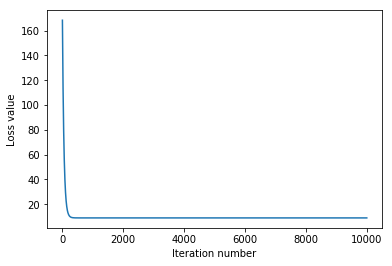

Learning Rate: 5.000000e-08
Regularization Strength: 1.000000e+05
training accuracy: 0.412327
validation accuracy: 0.411000


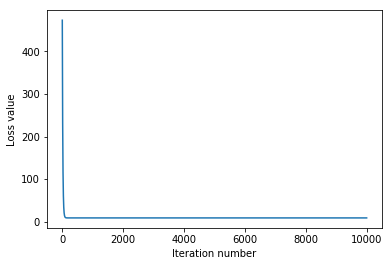

Learning Rate: 5.000000e-08
Regularization Strength: 3.000000e+05
training accuracy: 0.411122
validation accuracy: 0.409000


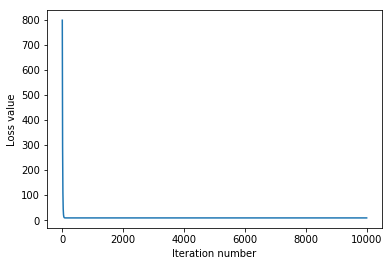

Learning Rate: 5.000000e-08
Regularization Strength: 5.000000e+05
training accuracy: 0.412531
validation accuracy: 0.411000


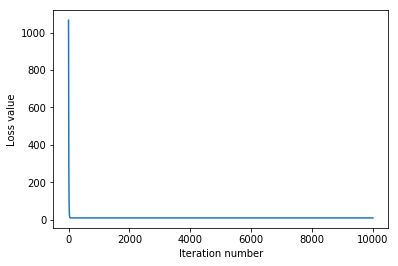

Learning Rate: 5.000000e-08
Regularization Strength: 7.000000e+05
training accuracy: 0.406714
validation accuracy: 0.405000


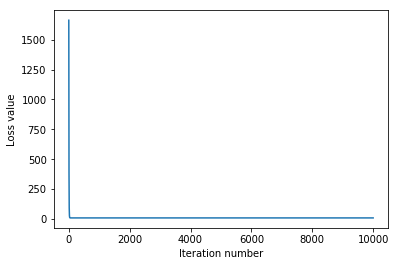

Learning Rate: 5.000000e-08
Regularization Strength: 1.000000e+06
training accuracy: 0.411980
validation accuracy: 0.412000


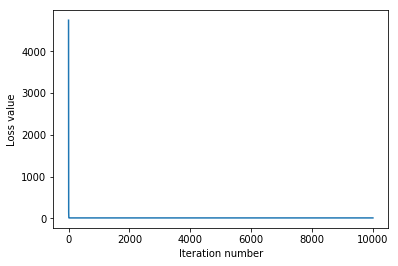

Learning Rate: 5.000000e-08
Regularization Strength: 3.000000e+06
training accuracy: 0.374673
validation accuracy: 0.382000


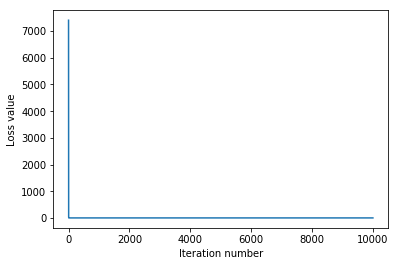

Learning Rate: 5.000000e-08
Regularization Strength: 5.000000e+06
training accuracy: 0.379857
validation accuracy: 0.384000


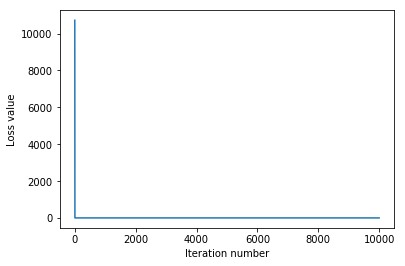

Learning Rate: 5.000000e-08
Regularization Strength: 7.000000e+06
training accuracy: 0.356673
validation accuracy: 0.362000


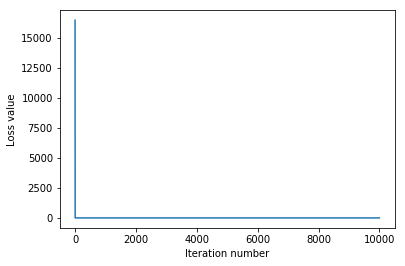

Learning Rate: 5.000000e-08
Regularization Strength: 1.000000e+07
training accuracy: 0.323633
validation accuracy: 0.343000


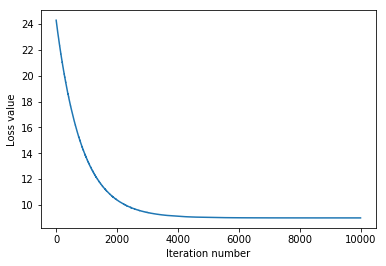

Learning Rate: 3.000000e-08
Regularization Strength: 1.000000e+04
training accuracy: 0.407041
validation accuracy: 0.415000


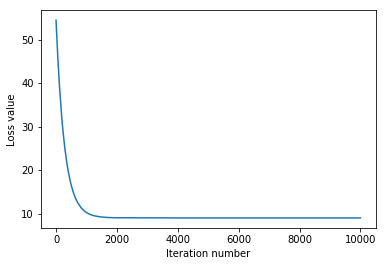

Learning Rate: 3.000000e-08
Regularization Strength: 3.000000e+04
training accuracy: 0.415163
validation accuracy: 0.419000


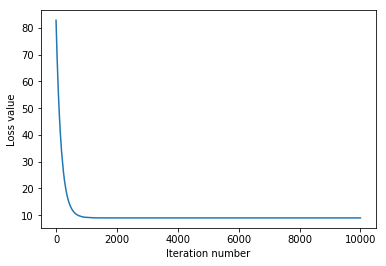

Learning Rate: 3.000000e-08
Regularization Strength: 5.000000e+04
training accuracy: 0.415816
validation accuracy: 0.410000


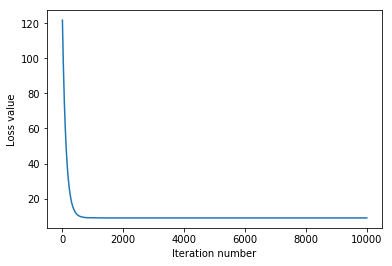

Learning Rate: 3.000000e-08
Regularization Strength: 7.000000e+04
training accuracy: 0.416020
validation accuracy: 0.422000


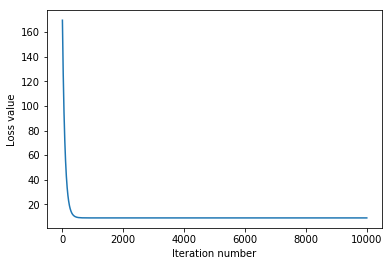

Learning Rate: 3.000000e-08
Regularization Strength: 1.000000e+05
training accuracy: 0.414102
validation accuracy: 0.417000


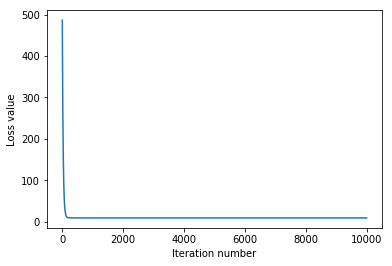

Learning Rate: 3.000000e-08
Regularization Strength: 3.000000e+05
training accuracy: 0.413673
validation accuracy: 0.408000


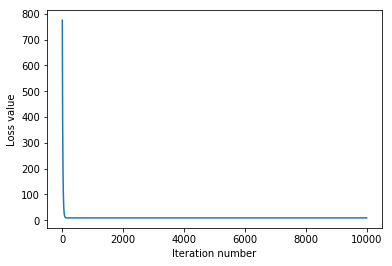

Learning Rate: 3.000000e-08
Regularization Strength: 5.000000e+05
training accuracy: 0.411082
validation accuracy: 0.410000


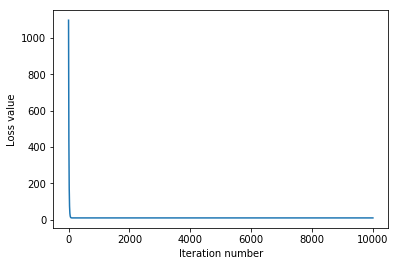

Learning Rate: 3.000000e-08
Regularization Strength: 7.000000e+05
training accuracy: 0.410673
validation accuracy: 0.412000


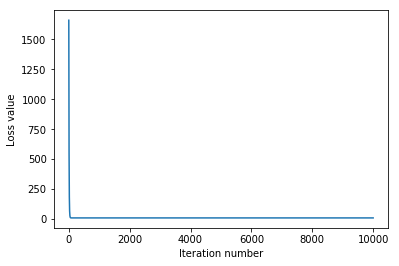

Learning Rate: 3.000000e-08
Regularization Strength: 1.000000e+06
training accuracy: 0.415837
validation accuracy: 0.416000


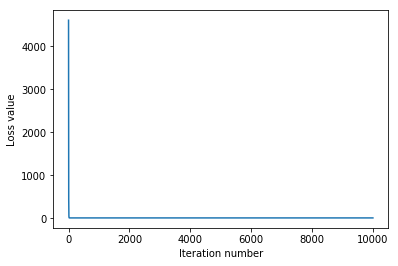

Learning Rate: 3.000000e-08
Regularization Strength: 3.000000e+06
training accuracy: 0.401980
validation accuracy: 0.394000


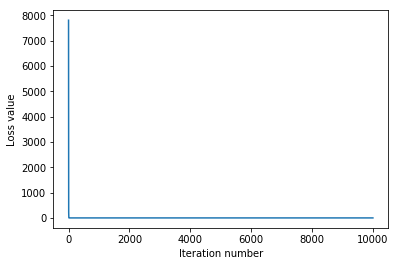

Learning Rate: 3.000000e-08
Regularization Strength: 5.000000e+06
training accuracy: 0.403898
validation accuracy: 0.402000


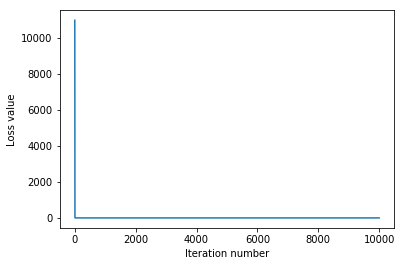

Learning Rate: 3.000000e-08
Regularization Strength: 7.000000e+06
training accuracy: 0.361796
validation accuracy: 0.343000


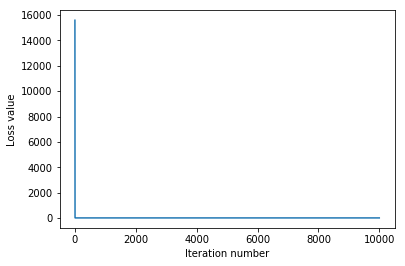

Learning Rate: 3.000000e-08
Regularization Strength: 1.000000e+07
training accuracy: 0.370143
validation accuracy: 0.384000


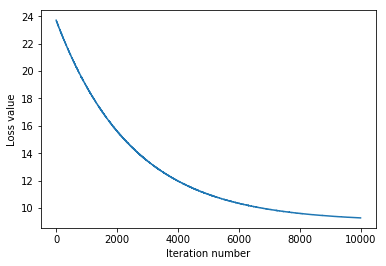

Learning Rate: 1.000000e-08
Regularization Strength: 1.000000e+04
training accuracy: 0.147694
validation accuracy: 0.144000


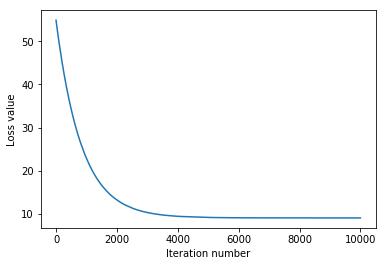

Learning Rate: 1.000000e-08
Regularization Strength: 3.000000e+04
training accuracy: 0.383429
validation accuracy: 0.360000


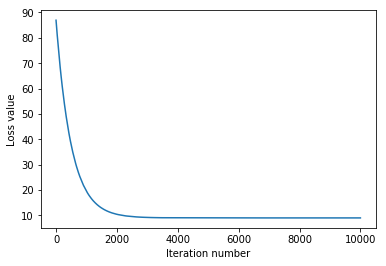

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+04
training accuracy: 0.414388
validation accuracy: 0.421000


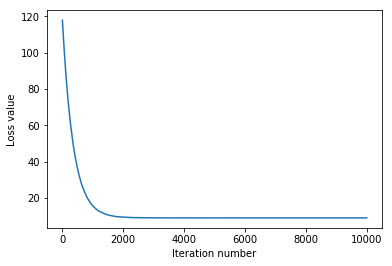

Learning Rate: 1.000000e-08
Regularization Strength: 7.000000e+04
training accuracy: 0.415408
validation accuracy: 0.418000


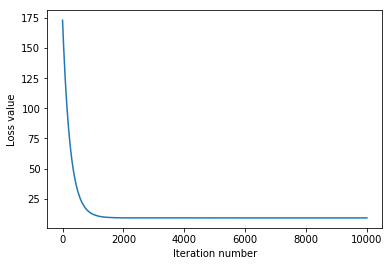

Learning Rate: 1.000000e-08
Regularization Strength: 1.000000e+05
training accuracy: 0.417184
validation accuracy: 0.417000


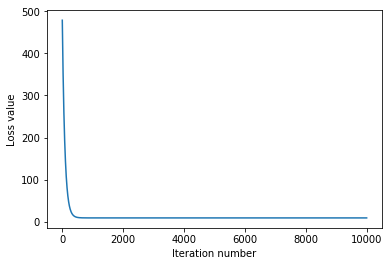

Learning Rate: 1.000000e-08
Regularization Strength: 3.000000e+05
training accuracy: 0.415327
validation accuracy: 0.416000


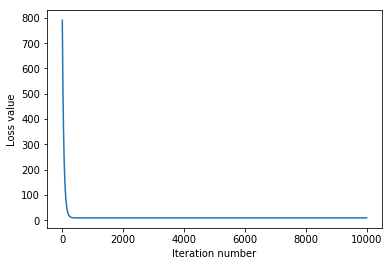

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+05
training accuracy: 0.414000
validation accuracy: 0.416000


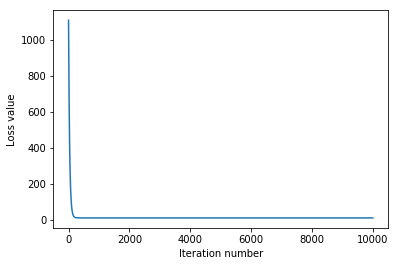

Learning Rate: 1.000000e-08
Regularization Strength: 7.000000e+05
training accuracy: 0.410041
validation accuracy: 0.411000


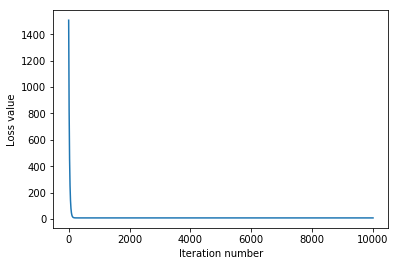

Learning Rate: 1.000000e-08
Regularization Strength: 1.000000e+06
training accuracy: 0.408367
validation accuracy: 0.414000


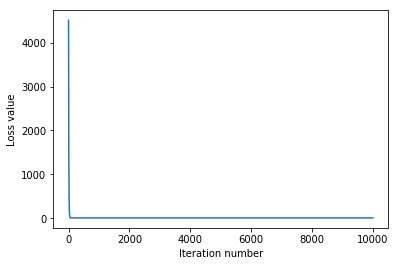

Learning Rate: 1.000000e-08
Regularization Strength: 3.000000e+06
training accuracy: 0.413612
validation accuracy: 0.415000


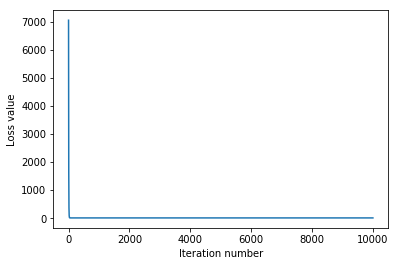

Learning Rate: 1.000000e-08
Regularization Strength: 5.000000e+06
training accuracy: 0.405939
validation accuracy: 0.414000


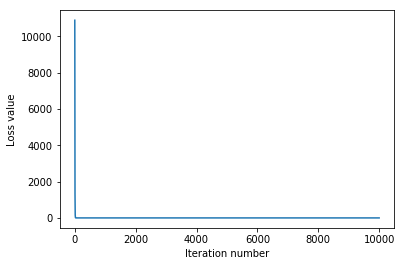

Learning Rate: 1.000000e-08
Regularization Strength: 7.000000e+06
training accuracy: 0.405714
validation accuracy: 0.399000


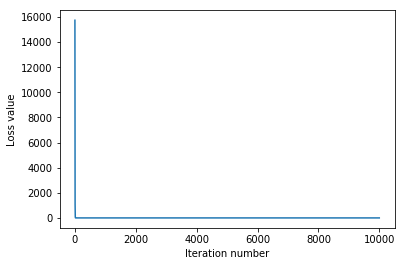

Learning Rate: 1.000000e-08
Regularization Strength: 1.000000e+07
training accuracy: 0.386918
validation accuracy: 0.367000


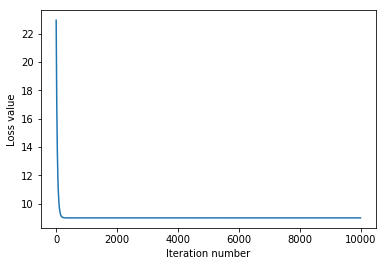

Learning Rate: 7.000000e-07
Regularization Strength: 1.000000e+04
training accuracy: 0.414449
validation accuracy: 0.425000


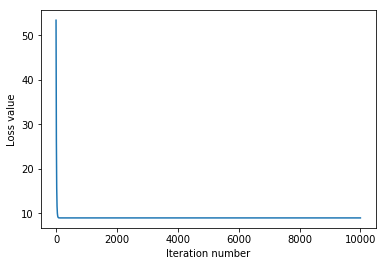

Learning Rate: 7.000000e-07
Regularization Strength: 3.000000e+04
training accuracy: 0.409020
validation accuracy: 0.425000


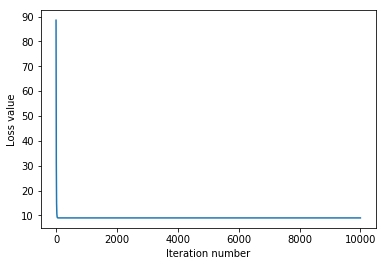

Learning Rate: 7.000000e-07
Regularization Strength: 5.000000e+04
training accuracy: 0.405000
validation accuracy: 0.406000


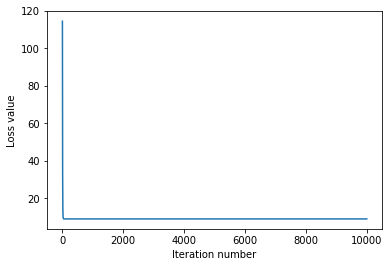

Learning Rate: 7.000000e-07
Regularization Strength: 7.000000e+04
training accuracy: 0.412204
validation accuracy: 0.409000


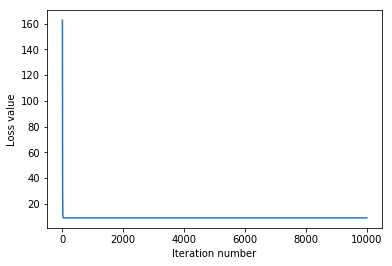

Learning Rate: 7.000000e-07
Regularization Strength: 1.000000e+05
training accuracy: 0.416143
validation accuracy: 0.408000


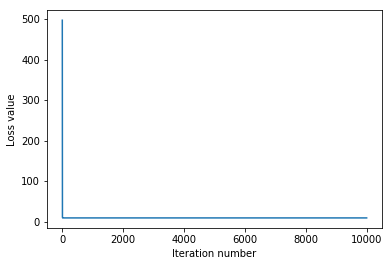

Learning Rate: 7.000000e-07
Regularization Strength: 3.000000e+05
training accuracy: 0.364816
validation accuracy: 0.376000


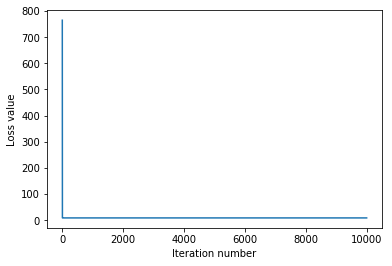

Learning Rate: 7.000000e-07
Regularization Strength: 5.000000e+05
training accuracy: 0.362429
validation accuracy: 0.379000


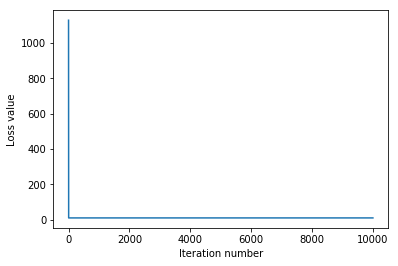

Learning Rate: 7.000000e-07
Regularization Strength: 7.000000e+05
training accuracy: 0.338163
validation accuracy: 0.356000


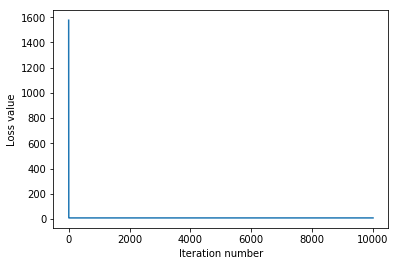

Learning Rate: 7.000000e-07
Regularization Strength: 1.000000e+06
training accuracy: 0.286735
validation accuracy: 0.286000


C:\Users\I311656\workspace\my\University\masters\dl-tf\assignment1\deep_learning_su\classifiers\linear_svm.py:69: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
c:\program files\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\I311656\workspace\my\University\masters\dl-tf\assignment1\deep_learning_su\classifiers\linear_svm.py:69: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
C:\Users\I311656\workspace\my\University\masters\dl-tf\assignment1\deep_learning_su\classifiers\linear_svm.py:77: RuntimeWarning: overflow encountered in multiply
  dW += reg * 2 * W
C:\Users\I311656\workspace\my\University\masters\dl-tf\assignment1\deep_learning_su\classifiers\linear_svm.py:65: RuntimeWarning: invalid value encountered in subtract
  margin = scores - correct_class_score + mask
C:\Users\I311656\workspace\my\Univers

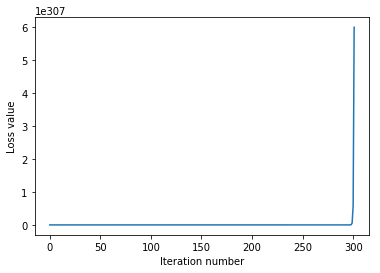

Learning Rate: 7.000000e-07
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


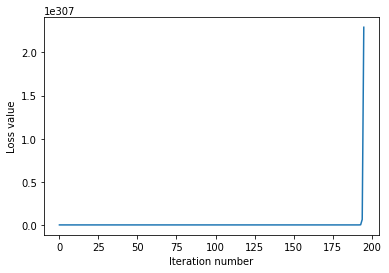

Learning Rate: 7.000000e-07
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


c:\program files\python\python36\lib\site-packages\matplotlib\ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
c:\program files\python\python36\lib\site-packages\matplotlib\ticker.py:1720: RuntimeWarning: overflow encountered in double_scalars
  return (d + 1) * self._base


ValueError: Maximum allowed size exceeded

<Figure size 432x288 with 1 Axes>

Learning Rate: 7.000000e-07
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


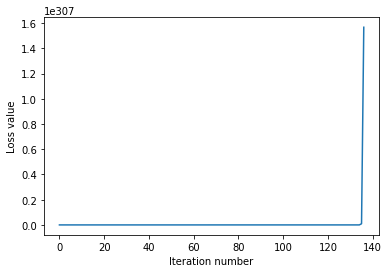

Learning Rate: 7.000000e-07
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


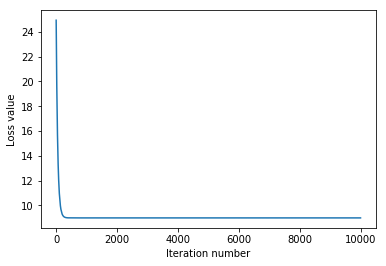

Learning Rate: 5.000000e-07
Regularization Strength: 1.000000e+04
training accuracy: 0.414388
validation accuracy: 0.418000


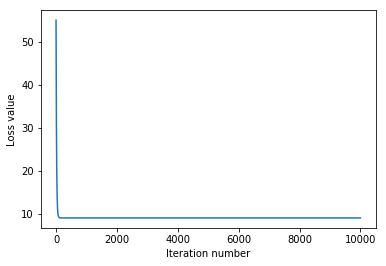

Learning Rate: 5.000000e-07
Regularization Strength: 3.000000e+04
training accuracy: 0.413061
validation accuracy: 0.420000


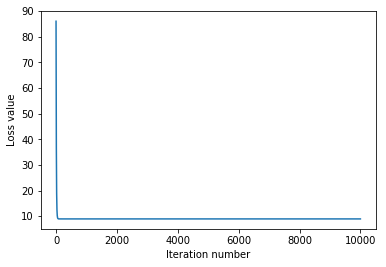

Learning Rate: 5.000000e-07
Regularization Strength: 5.000000e+04
training accuracy: 0.414816
validation accuracy: 0.406000


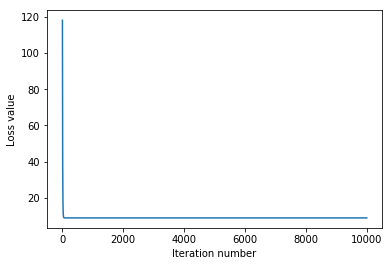

Learning Rate: 5.000000e-07
Regularization Strength: 7.000000e+04
training accuracy: 0.407367
validation accuracy: 0.428000


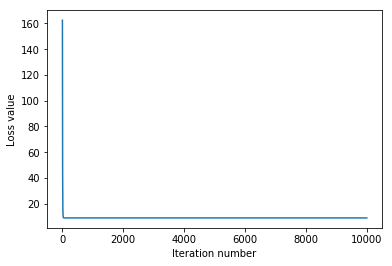

Learning Rate: 5.000000e-07
Regularization Strength: 1.000000e+05
training accuracy: 0.398673
validation accuracy: 0.388000


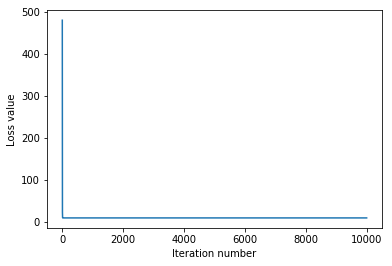

Learning Rate: 5.000000e-07
Regularization Strength: 3.000000e+05
training accuracy: 0.403041
validation accuracy: 0.410000


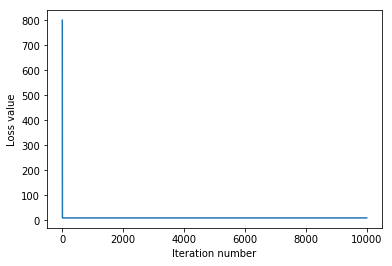

Learning Rate: 5.000000e-07
Regularization Strength: 5.000000e+05
training accuracy: 0.377673
validation accuracy: 0.343000


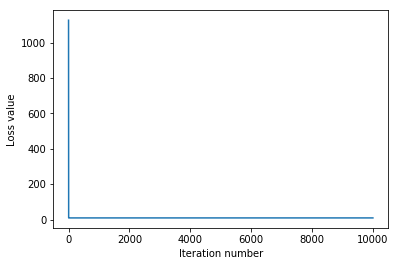

Learning Rate: 5.000000e-07
Regularization Strength: 7.000000e+05
training accuracy: 0.344184
validation accuracy: 0.338000


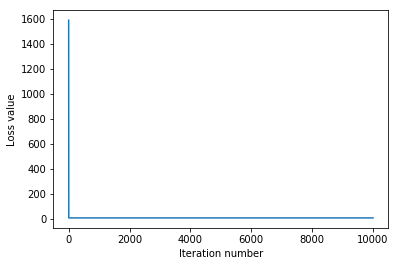

Learning Rate: 5.000000e-07
Regularization Strength: 1.000000e+06
training accuracy: 0.308306
validation accuracy: 0.278000


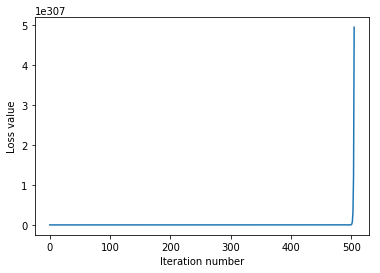

Learning Rate: 5.000000e-07
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


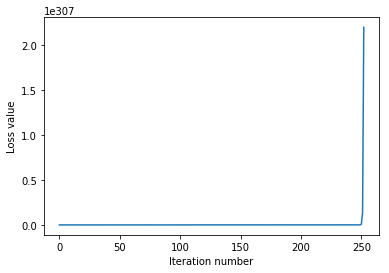

Learning Rate: 5.000000e-07
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


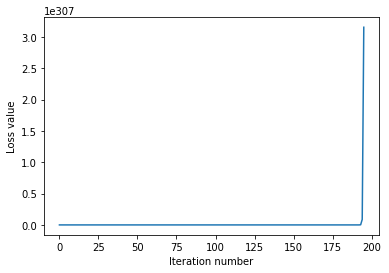

Learning Rate: 5.000000e-07
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


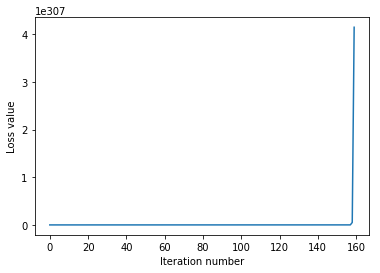

Learning Rate: 5.000000e-07
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


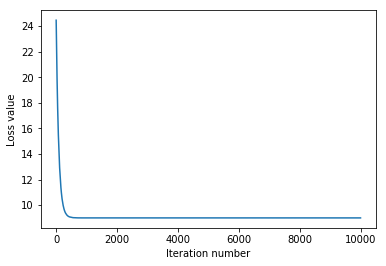

Learning Rate: 3.000000e-07
Regularization Strength: 1.000000e+04
training accuracy: 0.414224
validation accuracy: 0.413000


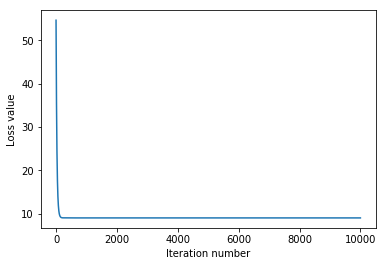

Learning Rate: 3.000000e-07
Regularization Strength: 3.000000e+04
training accuracy: 0.411918
validation accuracy: 0.409000


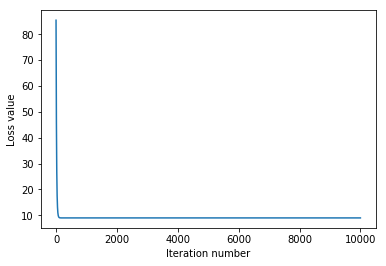

Learning Rate: 3.000000e-07
Regularization Strength: 5.000000e+04
training accuracy: 0.410143
validation accuracy: 0.418000


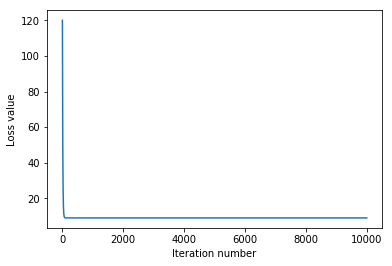

Learning Rate: 3.000000e-07
Regularization Strength: 7.000000e+04
training accuracy: 0.408224
validation accuracy: 0.405000


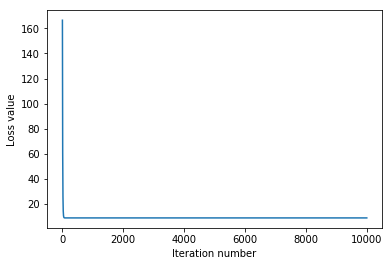

Learning Rate: 3.000000e-07
Regularization Strength: 1.000000e+05
training accuracy: 0.409510
validation accuracy: 0.395000


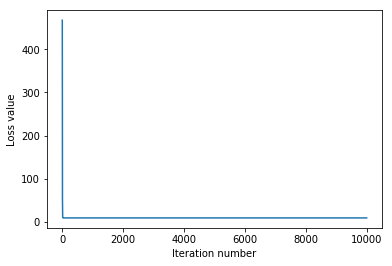

Learning Rate: 3.000000e-07
Regularization Strength: 3.000000e+05
training accuracy: 0.401347
validation accuracy: 0.402000


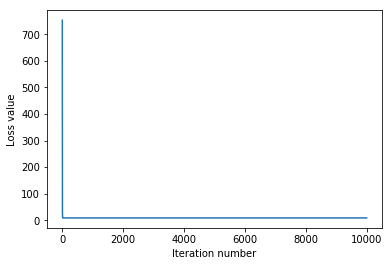

Learning Rate: 3.000000e-07
Regularization Strength: 5.000000e+05
training accuracy: 0.375388
validation accuracy: 0.352000


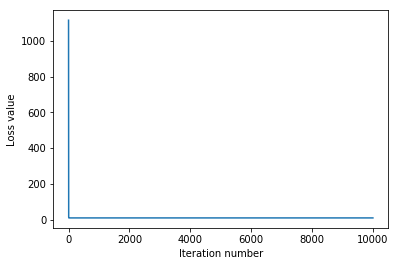

Learning Rate: 3.000000e-07
Regularization Strength: 7.000000e+05
training accuracy: 0.371347
validation accuracy: 0.401000


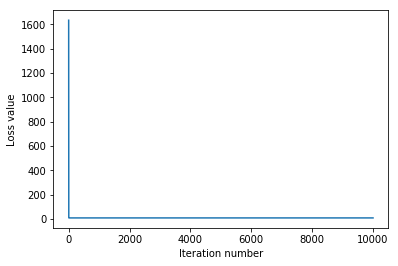

Learning Rate: 3.000000e-07
Regularization Strength: 1.000000e+06
training accuracy: 0.370735
validation accuracy: 0.381000


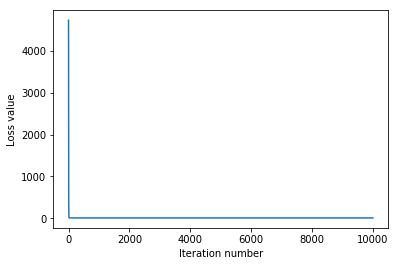

Learning Rate: 3.000000e-07
Regularization Strength: 3.000000e+06
training accuracy: 0.222551
validation accuracy: 0.230000


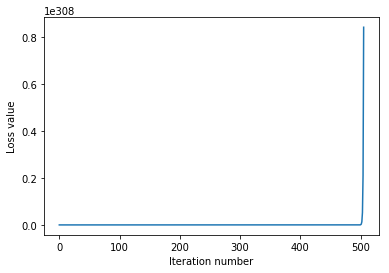

Learning Rate: 3.000000e-07
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


ValueError: Maximum allowed size exceeded

<Figure size 432x288 with 1 Axes>

Learning Rate: 3.000000e-07
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


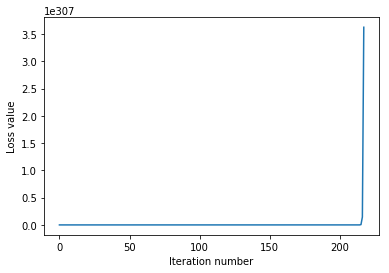

Learning Rate: 3.000000e-07
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


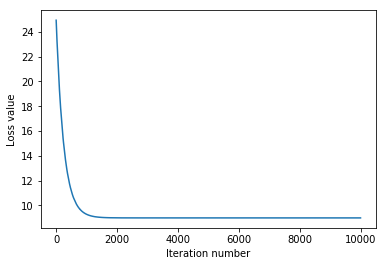

Learning Rate: 1.000000e-07
Regularization Strength: 1.000000e+04
training accuracy: 0.414143
validation accuracy: 0.418000


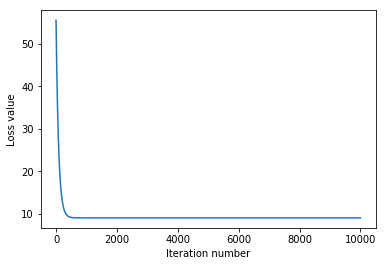

Learning Rate: 1.000000e-07
Regularization Strength: 3.000000e+04
training accuracy: 0.413429
validation accuracy: 0.420000


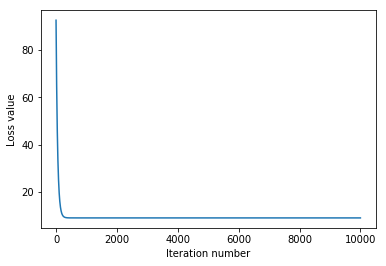

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+04
training accuracy: 0.410469
validation accuracy: 0.409000


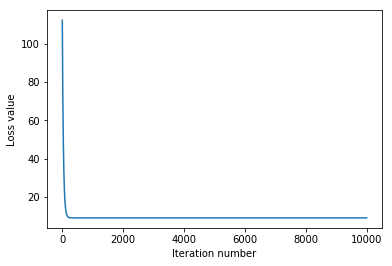

Learning Rate: 1.000000e-07
Regularization Strength: 7.000000e+04
training accuracy: 0.416000
validation accuracy: 0.417000


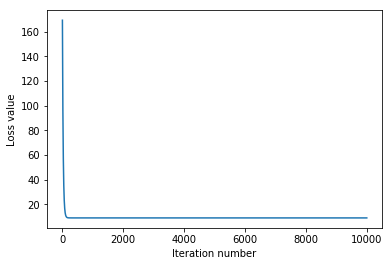

Learning Rate: 1.000000e-07
Regularization Strength: 1.000000e+05
training accuracy: 0.410204
validation accuracy: 0.414000


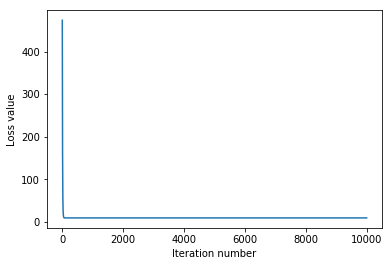

Learning Rate: 1.000000e-07
Regularization Strength: 3.000000e+05
training accuracy: 0.411857
validation accuracy: 0.411000


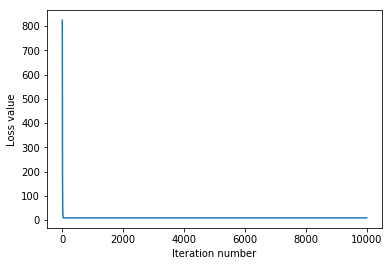

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+05
training accuracy: 0.412857
validation accuracy: 0.419000


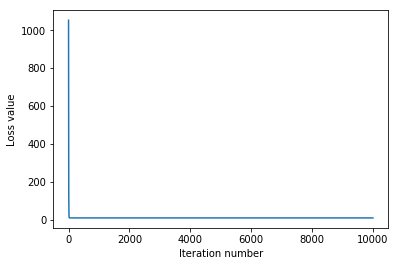

Learning Rate: 1.000000e-07
Regularization Strength: 7.000000e+05
training accuracy: 0.400592
validation accuracy: 0.387000


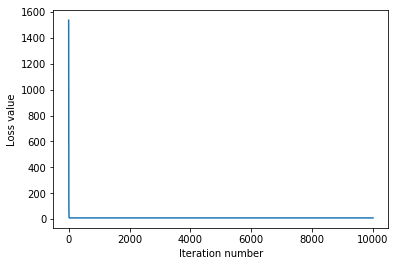

Learning Rate: 1.000000e-07
Regularization Strength: 1.000000e+06
training accuracy: 0.393429
validation accuracy: 0.399000


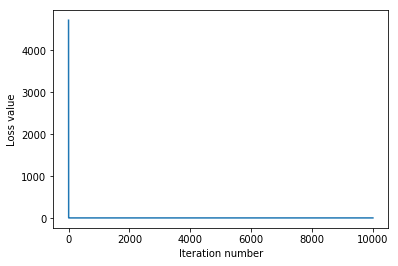

Learning Rate: 1.000000e-07
Regularization Strength: 3.000000e+06
training accuracy: 0.353531
validation accuracy: 0.351000


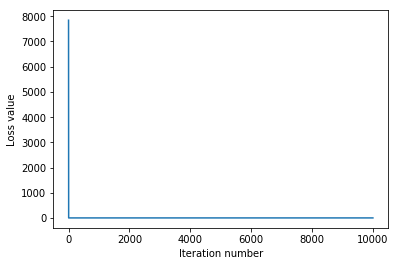

Learning Rate: 1.000000e-07
Regularization Strength: 5.000000e+06
training accuracy: 0.328367
validation accuracy: 0.337000


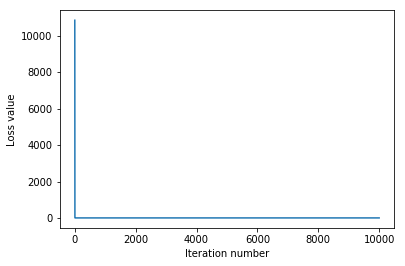

Learning Rate: 1.000000e-07
Regularization Strength: 7.000000e+06
training accuracy: 0.321755
validation accuracy: 0.329000


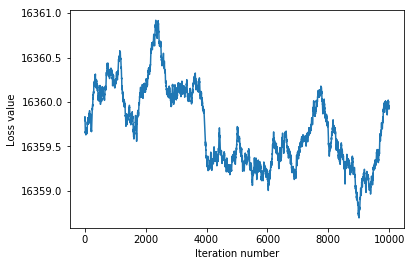

Learning Rate: 1.000000e-07
Regularization Strength: 1.000000e+07
training accuracy: 0.088735
validation accuracy: 0.091000


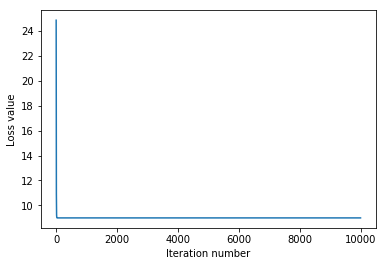

Learning Rate: 7.000000e-06
Regularization Strength: 1.000000e+04
training accuracy: 0.400755
validation accuracy: 0.412000


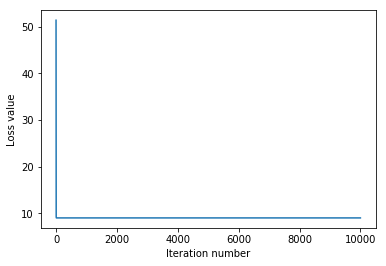

Learning Rate: 7.000000e-06
Regularization Strength: 3.000000e+04
training accuracy: 0.389612
validation accuracy: 0.379000


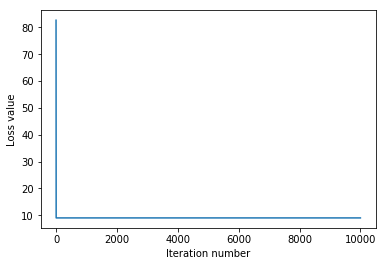

Learning Rate: 7.000000e-06
Regularization Strength: 5.000000e+04
training accuracy: 0.341816
validation accuracy: 0.347000


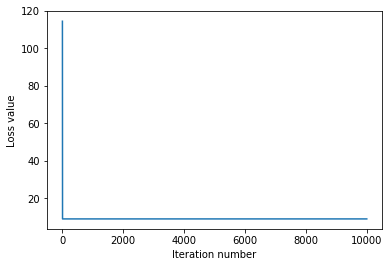

Learning Rate: 7.000000e-06
Regularization Strength: 7.000000e+04
training accuracy: 0.339224
validation accuracy: 0.335000


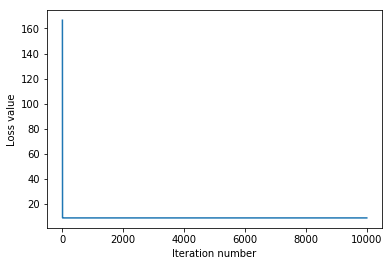

Learning Rate: 7.000000e-06
Regularization Strength: 1.000000e+05
training accuracy: 0.260571
validation accuracy: 0.270000


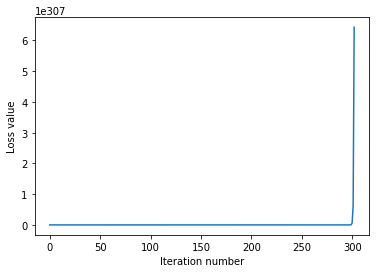

Learning Rate: 7.000000e-06
Regularization Strength: 3.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


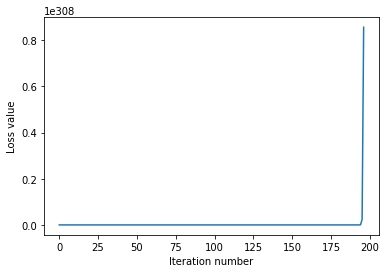

Learning Rate: 7.000000e-06
Regularization Strength: 5.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


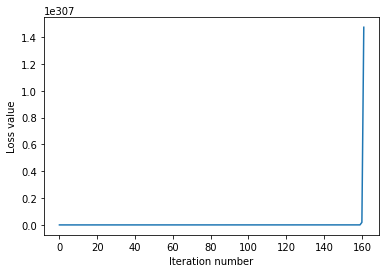

Learning Rate: 7.000000e-06
Regularization Strength: 7.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


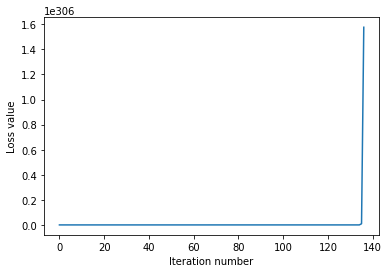

Learning Rate: 7.000000e-06
Regularization Strength: 1.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


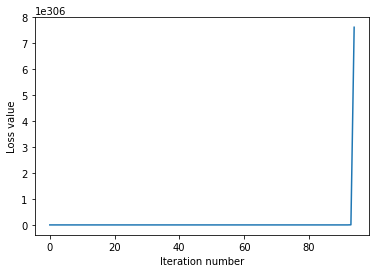

Learning Rate: 7.000000e-06
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


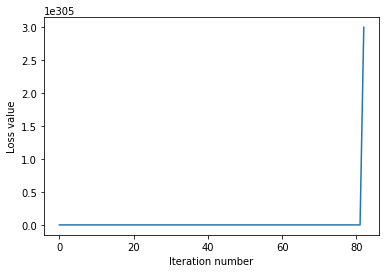

Learning Rate: 7.000000e-06
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


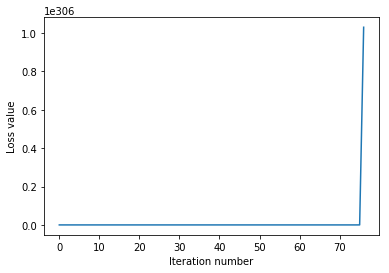

Learning Rate: 7.000000e-06
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


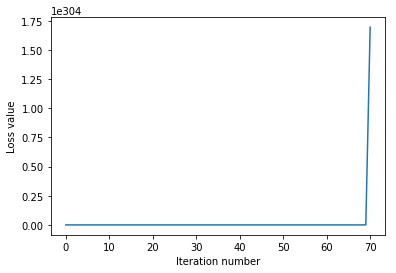

Learning Rate: 7.000000e-06
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


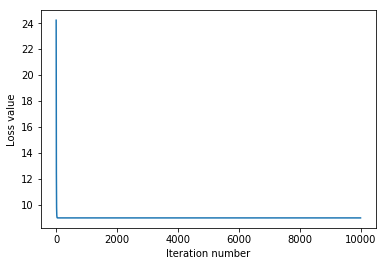

Learning Rate: 5.000000e-06
Regularization Strength: 1.000000e+04
training accuracy: 0.404061
validation accuracy: 0.421000


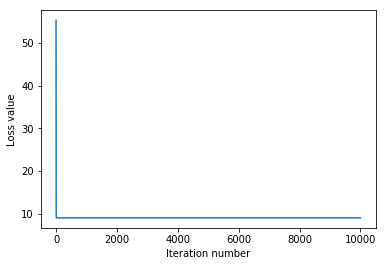

Learning Rate: 5.000000e-06
Regularization Strength: 3.000000e+04
training accuracy: 0.392429
validation accuracy: 0.381000


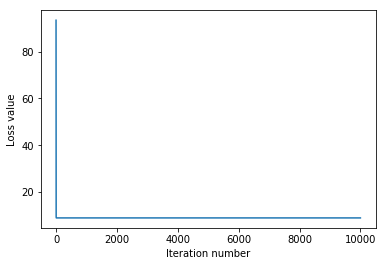

Learning Rate: 5.000000e-06
Regularization Strength: 5.000000e+04
training accuracy: 0.368408
validation accuracy: 0.358000


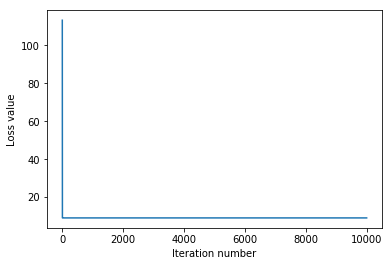

Learning Rate: 5.000000e-06
Regularization Strength: 7.000000e+04
training accuracy: 0.342143
validation accuracy: 0.337000


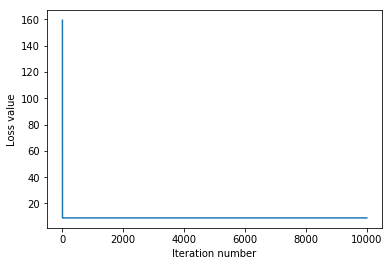

Learning Rate: 5.000000e-06
Regularization Strength: 1.000000e+05
training accuracy: 0.286000
validation accuracy: 0.277000


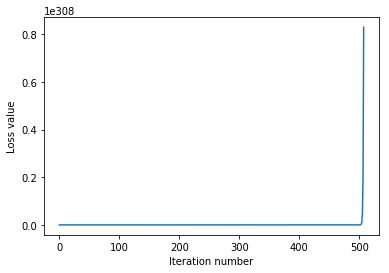

Learning Rate: 5.000000e-06
Regularization Strength: 3.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


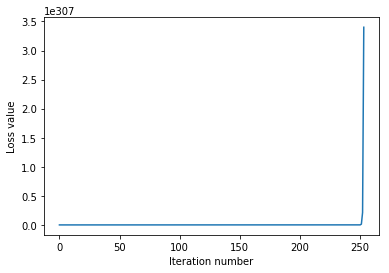

Learning Rate: 5.000000e-06
Regularization Strength: 5.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


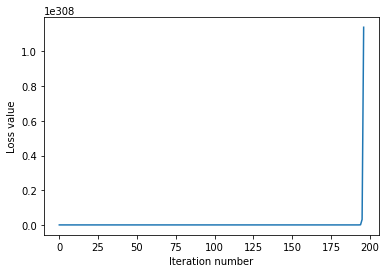

Learning Rate: 5.000000e-06
Regularization Strength: 7.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


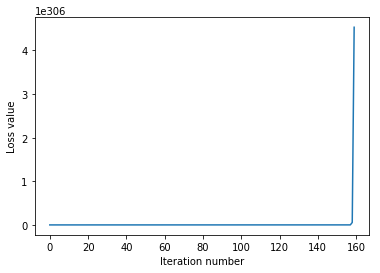

Learning Rate: 5.000000e-06
Regularization Strength: 1.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


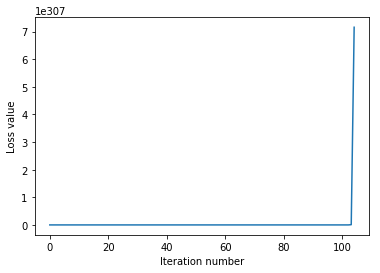

Learning Rate: 5.000000e-06
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


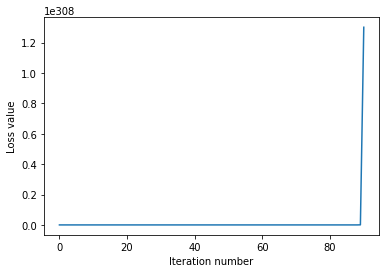

Learning Rate: 5.000000e-06
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


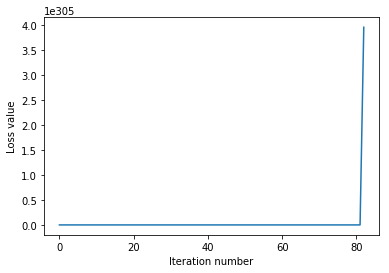

Learning Rate: 5.000000e-06
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


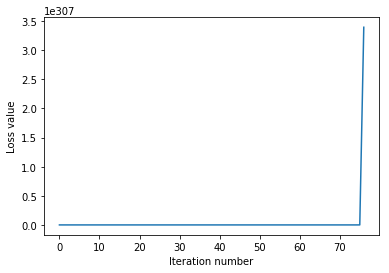

Learning Rate: 5.000000e-06
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


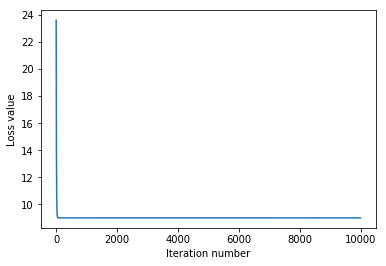

Learning Rate: 3.000000e-06
Regularization Strength: 1.000000e+04
training accuracy: 0.416469
validation accuracy: 0.424000


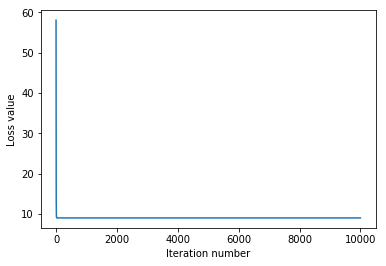

Learning Rate: 3.000000e-06
Regularization Strength: 3.000000e+04
training accuracy: 0.391939
validation accuracy: 0.393000


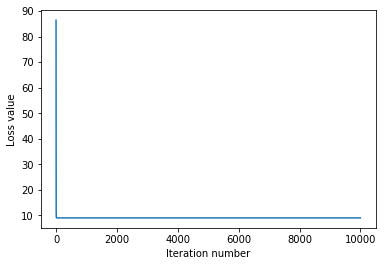

Learning Rate: 3.000000e-06
Regularization Strength: 5.000000e+04
training accuracy: 0.397367
validation accuracy: 0.413000


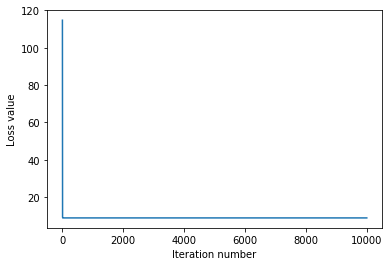

Learning Rate: 3.000000e-06
Regularization Strength: 7.000000e+04
training accuracy: 0.384980
validation accuracy: 0.382000


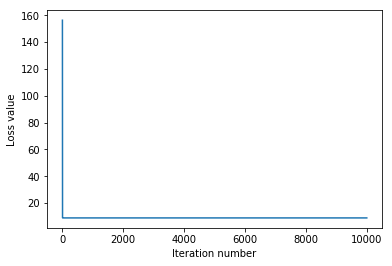

Learning Rate: 3.000000e-06
Regularization Strength: 1.000000e+05
training accuracy: 0.371082
validation accuracy: 0.392000


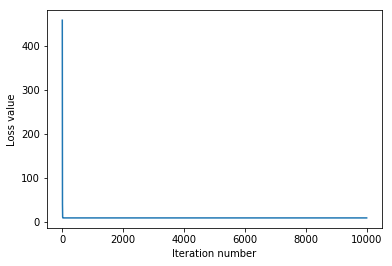

Learning Rate: 3.000000e-06
Regularization Strength: 3.000000e+05
training accuracy: 0.209959
validation accuracy: 0.222000


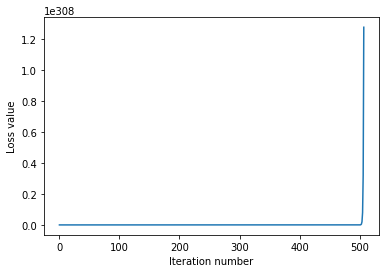

Learning Rate: 3.000000e-06
Regularization Strength: 5.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


ValueError: Maximum allowed size exceeded

<Figure size 432x288 with 1 Axes>

Learning Rate: 3.000000e-06
Regularization Strength: 7.000000e+05
training accuracy: 0.100265
validation accuracy: 0.087000


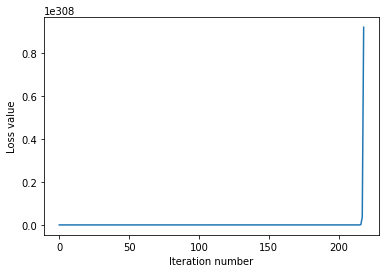

Learning Rate: 3.000000e-06
Regularization Strength: 1.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


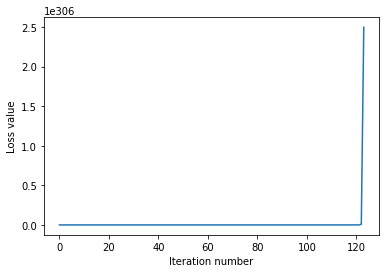

Learning Rate: 3.000000e-06
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


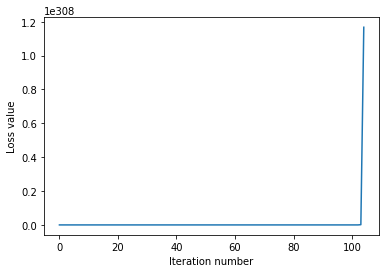

Learning Rate: 3.000000e-06
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


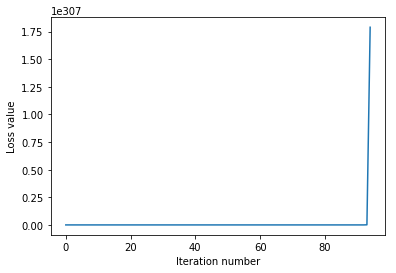

Learning Rate: 3.000000e-06
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


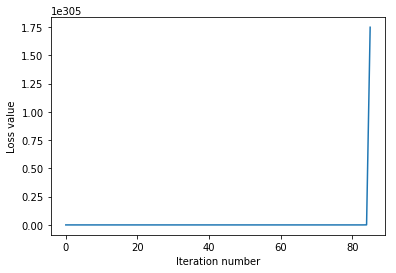

Learning Rate: 3.000000e-06
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000


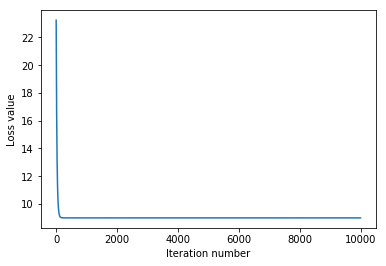

Learning Rate: 1.000000e-06
Regularization Strength: 1.000000e+04
training accuracy: 0.413347
validation accuracy: 0.410000


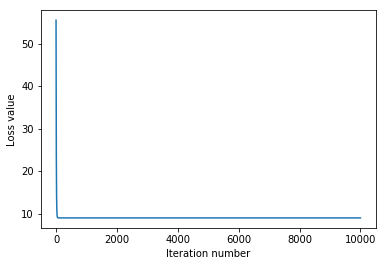

Learning Rate: 1.000000e-06
Regularization Strength: 3.000000e+04
training accuracy: 0.410939
validation accuracy: 0.409000


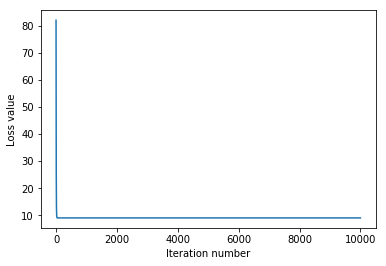

Learning Rate: 1.000000e-06
Regularization Strength: 5.000000e+04
training accuracy: 0.407490
validation accuracy: 0.415000


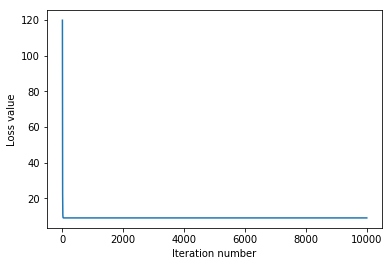

Learning Rate: 1.000000e-06
Regularization Strength: 7.000000e+04
training accuracy: 0.400204
validation accuracy: 0.401000


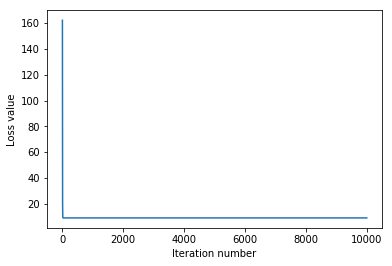

Learning Rate: 1.000000e-06
Regularization Strength: 1.000000e+05
training accuracy: 0.403388
validation accuracy: 0.407000


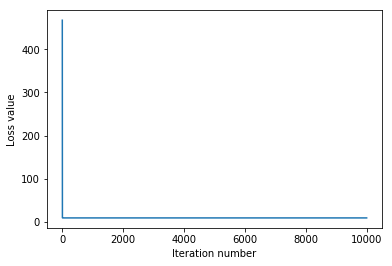

Learning Rate: 1.000000e-06
Regularization Strength: 3.000000e+05
training accuracy: 0.353857
validation accuracy: 0.336000


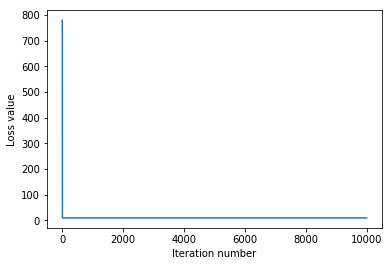

Learning Rate: 1.000000e-06
Regularization Strength: 5.000000e+05
training accuracy: 0.297980
validation accuracy: 0.313000


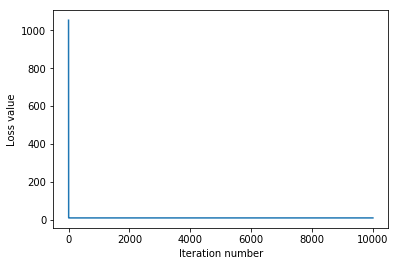

Learning Rate: 1.000000e-06
Regularization Strength: 7.000000e+05
training accuracy: 0.288429
validation accuracy: 0.315000


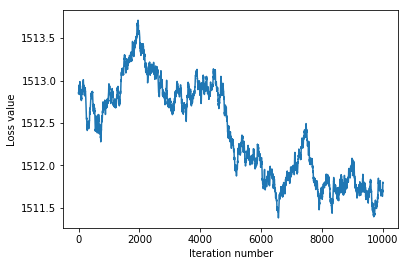

Learning Rate: 1.000000e-06
Regularization Strength: 1.000000e+06
training accuracy: 0.123898
validation accuracy: 0.120000


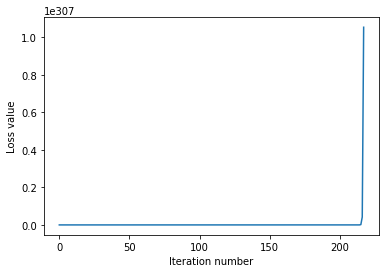

Learning Rate: 1.000000e-06
Regularization Strength: 3.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


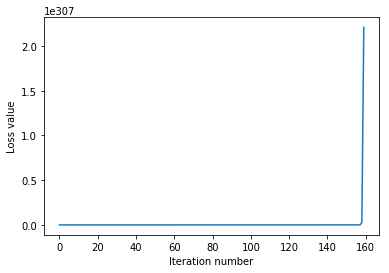

Learning Rate: 1.000000e-06
Regularization Strength: 5.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


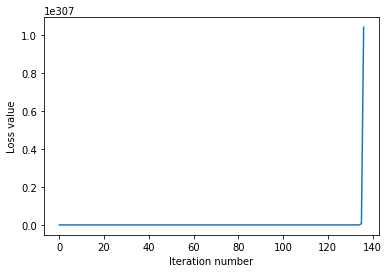

Learning Rate: 1.000000e-06
Regularization Strength: 7.000000e+06
training accuracy: 0.100265
validation accuracy: 0.087000


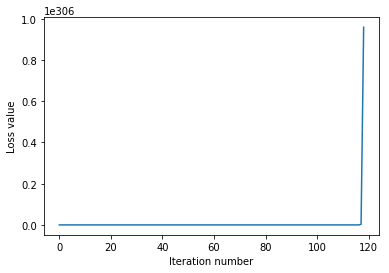

Learning Rate: 1.000000e-06
Regularization Strength: 1.000000e+07
training accuracy: 0.100265
validation accuracy: 0.087000
lr 1.000000e-09 reg 1.000000e+04 train accuracy: 0.112653 val accuracy: 0.106000
lr 1.000000e-09 reg 3.000000e+04 train accuracy: 0.108449 val accuracy: 0.117000
lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.087755 val accuracy: 0.076000
lr 1.000000e-09 reg 7.000000e+04 train accuracy: 0.086367 val accuracy: 0.085000
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.090918 val accuracy: 0.095000
lr 1.000000e-09 reg 3.000000e+05 train accuracy: 0.175551 val accuracy: 0.162000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.409143 val accuracy: 0.408000
lr 1.000000e-09 reg 7.000000e+05 train accuracy: 0.416388 val accuracy: 0.420000
lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.414000 val accuracy: 0.423000
lr 1.000000e-09 reg 3.000000e+06 train accuracy: 0.417041 val accuracy: 0.423000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.414714 val accu

In [37]:
# Use the validation set to tune the learning rate and regularization strength

from itertools import product
from deep_learning_su.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 7e-8, 5e-8, 3e-8, 1e-8, 7e-7, 5e-7, 3e-7, 1e-7, 7e-6, 5e-6, 3e-6, 1e-6]
regularization_strengths = [1e4, 3e4, 5e4, 7e4, 1e5, 3e5, 5e5, 7e5, 1e6, 3e6, 5e6, 7e6, 1e7]

results = {}
best_val = -1
best_svm = None

for lr, reg in product(learning_rates, regularization_strengths):
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=10000, verbose=False)
    
    plt.plot(loss_hist)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    print("Learning Rate: %e\nRegularization Strength: %e" % (lr, reg))

    y_train_pred = svm.predict(X_train_feats)
    training_accuracy = np.mean(y_train == y_train_pred)
    print('training accuracy: %f' % training_accuracy)
    y_val_pred = svm.predict(X_val_feats)
    val_accuracy = np.mean(y_val == y_val_pred)
    print('validation accuracy: %f' % val_accuracy)
    results[(lr, reg)] = (training_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_svm = svm

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [ ]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

In [ ]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [ ]:
print(X_train_feats.shape)

In [ ]:
from deep_learning_su.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!